In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
# embeber en los cuadernos interactivos la salida de matplotlib
%matplotlib inline

In [45]:
print("Nuestra caja experimental!")
a = 3/2
b = 4
c = -3
N=100
x = np.linspace(0,10,N) # 0.2 y 10 en N elementos igualmente espaciados
y = a/(1+np.exp(c*(x-b))) # modelo teorico -> principio fisico, matematico, biologico...
x1 = x + np.random.exponential(0.01,size=N)
y1 = y + np.random.normal(0,0.05,size=N) # ruido gaussiano
x2 = x + np.random.normal(0,0.03,size=N)
y2 = y + np.random.exponential(0.05,size=N) # ruido exponencial

Nuestra caja experimental!


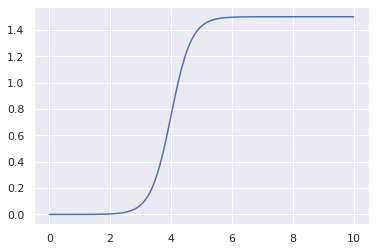

In [46]:
plt.plot(x,y)

In [53]:
Nf = 100
a = np.min(x)
b = np.max(x)
def a_j(j):
    global a, b, x, y
    # integra la funcion entre 0 y 10
    L = b - a
    k_j = 2*j*np.pi/L
    new_y = y*np.cos(k_j*x)/L
    if j > 0:
        new_y = new_y * 2
    return sp.integrate.simpson(new_y, x)
def b_j(j):
    global a, b, x, y
    # integra la funcion entre 0 y 10
    L = b - a
    k_j = 2*j*np.pi/L
    new_y = y*np.sin(k_j*x)/L
    if j > 0:
        new_y = new_y * 2
    return sp.integrate.simpson(new_y, x)
J = np.array(range(Nf))
A_j = np.array([a_j(j) for j in range(Nf)])
B_j = np.array([b_j(j) for j in range(Nf)])

In [54]:
x_tilde = np.linspace(a,2*b-a,20000)
k_j = np.array([2*j*np.pi/10 for j in range(Nf)])
y_tilde = np.sum([
    A_j[j] * np.cos(k_j[j]*x_tilde) + B_j[j] * np.sin(k_j[j]*x_tilde) for j in range(Nf)
], axis=0)

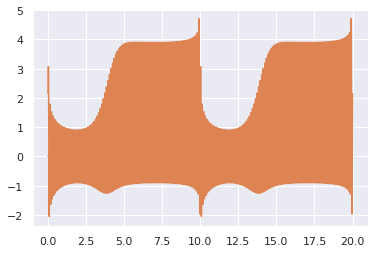

In [55]:
plt.plot(x,y)
plt.plot(x_tilde, y_tilde)

/opt/conda3/envs/fisi2028/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

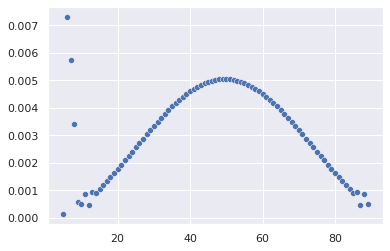

In [57]:
sns.scatterplot(J[5:-10],np.abs(A_j)[5:-10])